In [11]:
import math

import matplotlib.pyplot as plt
import numpy as np

import skfda
from skfda.misc.hat_matrix import (
    KNeighborsHatMatrix,
    LocalLinearRegressionHatMatrix,
    NadarayaWatsonHatMatrix,
)
from skfda.misc.kernels import uniform
from skfda.preprocessing.smoothing import KernelSmoother
from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch


import matplotlib.pyplot as plt

import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)

In [2]:
dataset = skfda.datasets.fetch_phoneme()

In [3]:
dataset

{'data': FDataGrid(
     array([[[ 9.8577 ],
             [ 9.20711],
             [ 9.81689],
             ...,
             [12.92489],
             [12.51195],
             [ 9.75527]],
     
            [[13.23079],
             [14.19189],
             [15.34428],
             ...,
             [ 5.38504],
             [ 9.43063],
             [ 8.59328]],
     
            [[10.81889],
             [ 9.07615],
             [ 9.7794 ],
             ...,
             [ 6.58416],
             [ 6.27058],
             [ 3.85042]],
     
            ...,
     
            [[12.30174],
             [12.40383],
             [ 9.06497],
             ...,
             [ 9.88007],
             [10.82203],
             [12.00199]],
     
            [[ 8.39388],
             [ 9.8477 ],
             [16.24534],
             ...,
             [ 9.37979],
             [ 6.83916],
             [ 8.54817]],
     
            [[ 8.14032],
             [ 9.93753],
             [16.30187],
       

In [4]:
# import skfda
# import matplotlib.pyplot as plt

# grid_points = [0, 0.2, 0.5, 0.9, 1]  # Grid points of the curves
# data_matrix = [
#     [0, 0.2, 0.5, 0.9, 1],     # First observation
#    [0, 0.04, 0.25, 0.81, 1],  # Second observation
# ]

# fd = skfda.FDataGrid(
#    data_matrix=data_matrix,
#     grid_points=grid_points,
# )

# fd.plot()
# plt.show()

In [5]:
fd = dataset['data'][:300]

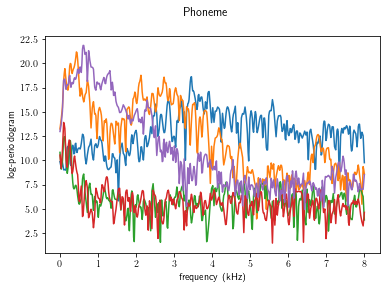

In [8]:
fd[:5].plot()
plt.show()

In [10]:
fd

FDataGrid(
    array([[[ 9.8577 ],
            [ 9.20711],
            [ 9.81689],
            ...,
            [12.92489],
            [12.51195],
            [ 9.75527]],
    
           [[13.23079],
            [14.19189],
            [15.34428],
            ...,
            [ 5.38504],
            [ 9.43063],
            [ 8.59328]],
    
           [[10.81889],
            [ 9.07615],
            [ 9.7794 ],
            ...,
            [ 6.58416],
            [ 6.27058],
            [ 3.85042]],
    
           ...,
    
           [[10.03046],
            [10.2044 ],
            [16.3636 ],
            ...,
            [10.30931],
            [10.37672],
            [10.30385]],
    
           [[ 6.61537],
            [ 9.93492],
            [ 7.29832],
            ...,
            [ 8.72558],
            [ 9.53214],
            [ 3.59809]],
    
           [[ 8.87666],
            [ 7.95223],
            [ 8.34833],
            ...,
            [ 6.23224],
            [ 6.7200

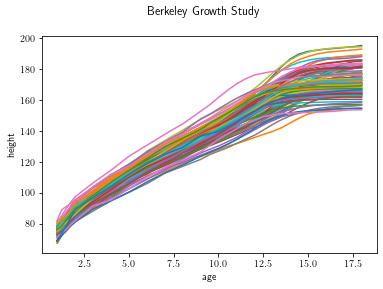

In [13]:
dataset = skfda.datasets.fetch_growth()
fd = dataset['data']
y = dataset['target']
fd.plot()
plt.show()

In [14]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(fd)

FPCA(_weights=array([0.08333333, 0.33333333, 0.16666667, 0.33333333, 0.41666667,
       1.33333333, 0.66666667, 1.33333333, 0.66666667, 1.33333333,
       0.5       , 0.66666667, 0.33333333, 0.66666667, 0.33333333,
       0.66666667, 0.33333333, 0.66666667, 0.33333333, 0.66666667,
       0.33333333, 0.66666667, 0.33333333, 0.66666667, 0.33333333,
       0.66666667, 0.33333333, 0.66666667, 0.33333333, 0.66666667,
       0.16666667]),
     n_components=2)

In [15]:
scores = fpca_discretized.transform(fd)

In [19]:
fd

FDataGrid(
    array([[[ 81.3],
            [ 84.2],
            [ 86.4],
            ...,
            [193.8],
            [194.3],
            [195.1]],
    
           [[ 76.2],
            [ 80.4],
            [ 83.2],
            ...,
            [176.1],
            [177.4],
            [178.7]],
    
           [[ 76.8],
            [ 79.8],
            [ 82.6],
            ...,
            [170.9],
            [171.2],
            [171.5]],
    
           ...,
    
           [[ 68.6],
            [ 73.6],
            [ 78.6],
            ...,
            [166. ],
            [166.3],
            [166.8]],
    
           [[ 79.9],
            [ 82.6],
            [ 84.8],
            ...,
            [168.3],
            [168.4],
            [168.6]],
    
           [[ 76.1],
            [ 78.4],
            [ 82.3],
            ...,
            [168.6],
            [168.9],
            [169.2]]]),
    grid_points=(array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  3.  ,  4.  ,  5. 